## Observations and Insights 

# Observations

*Capomulin has the greatest number of timepoints over any other drug regimen.

*Gender distribution is almost equal with Male mice only have a slightly higher share than female mice

*Mouse ID g989 was the only one with duplicate values

*Looking at only the drug regimens included in the box plot analysis, Infubinol was the only drug regimen with an outlier.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
unique_mice = combined_df["Mouse ID"].nunique()
unique_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset = ["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_complete = combined_df[combined_df.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)]
duplicate_mice_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = clean_df["Mouse ID"].nunique()
unique_mice_clean

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = clean_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df_mean = summary_df["Tumor Volume (mm3)"].mean()
summary_df_median = summary_df["Tumor Volume (mm3)"].median()
summary_df_variance = summary_df["Tumor Volume (mm3)"].var()
summary_df_std = summary_df["Tumor Volume (mm3)"].std()
summary_df_sem = summary_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_grouped = pd.DataFrame({"Mean": summary_df_mean, "Median": summary_df_median, "Variance": summary_df_variance, "Standard Deviation": summary_df_std, "SEM":summary_df_sem})
summary_grouped

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

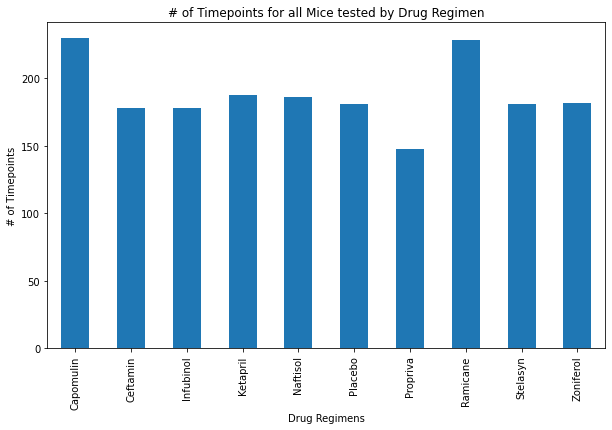

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_type = clean_df.groupby('Drug Regimen')
timepoint_total = drug_regimen_type['Timepoint'].count()

timepoint_and_regimen_chart = timepoint_total.plot(kind='bar', figsize=(10,6))

#set title and labels
timepoint_and_regimen_chart.set_xlabel("Drug Regimens")
timepoint_and_regimen_chart.set_ylabel("# of Timepoints")
plt.title("# of Timepoints for all Mice tested by Drug Regimen")
plt.show()
plt.tight_layout()

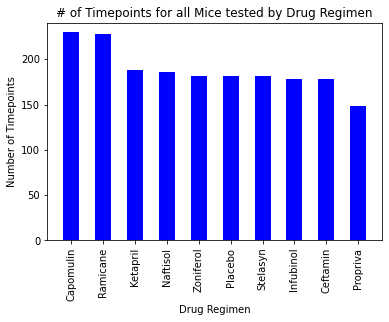

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_pyplot = clean_df['Drug Regimen'].value_counts()

#set x axis
x_axis = timepoint_pyplot.index
y_axis = timepoint_pyplot.values



#create a pyplot bar chart
plt.bar(x_axis, y_axis, color ='b', align = 'center', width = .5)

#set labels & title

plt.title("# of Timepoints for all Mice tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation ='vertical')
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.show()
plt.tight_layout()


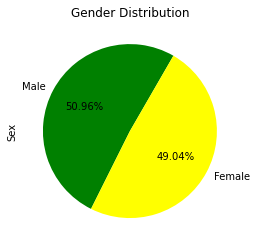

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
gender_pie=gender.plot(kind='pie', title="Gender Distribution", autopct="%.2f%%", colors=['green','yellow'], startangle=60)

plt.show()


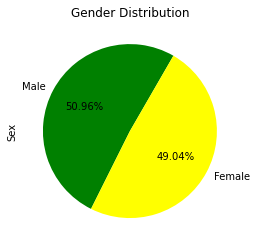

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#set the labels and values
labels=list(gender.index)

#set the colors
colors = ['green','yellow']

plt.pie(gender,labels=labels, colors=colors,autopct="%.2f%%",startangle=60)
plt.title('Gender Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint_df




Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = pd.merge(max_timepoint_df,clean_df, on=(['Mouse ID','Timepoint']))
max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

 # Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
    treatment_df = max_df.loc[max_df['Drug Regimen']==treatment]
    tumor_vol = treatment_df['Tumor Volume (mm3)']
    
    #add the subset
    tumor_vol_data.append(tumor_vol)


print(tumor_vol)  

 
    

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
quartiles_capomulin = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

quartiles_ramicane = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

quartiles_infubinol = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

quartiles_ceftamin = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

   # Determine outliers using upper and lower bounds
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)


#print
print(f"{treatments[0]} values below {lower_bound_capomulin} and above {upper_bound_capomulin} are potential outliers")
print(f"{treatments[1]} values below {lower_bound_ramicane} and above {upper_bound_ramicane} are potential outliers") 
print(f"{treatments[2]} values below {lower_bound_infubinol} and above {upper_bound_infubinol} are potential outliers") 
print(f"{treatments[3]} values below {lower_bound_ceftamin} and above {upper_bound_ceftamin} are potential outliers") 

Capomulin values below 20.70456164999999 and above 51.83201549 are potential outliers
Ramicane values below 17.912664470000003 and above 54.30681135 are potential outliers
Infubinol values below 36.83290494999999 and above 82.74144559000001 are potential outliers
Ceftamin values below 25.355449580000002 and above 87.66645829999999 are potential outliers


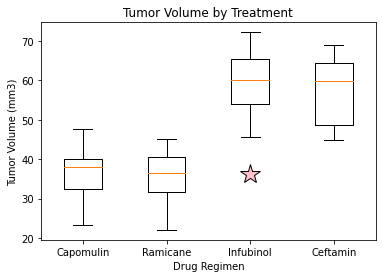

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers={'marker':'*', 'markersize':20, 'markerfacecolor':'pink'}
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels = treatments, flierprops=outliers)
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#find a mouse ID that has been treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
capomulin_mouse.value_counts('Mouse ID')

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

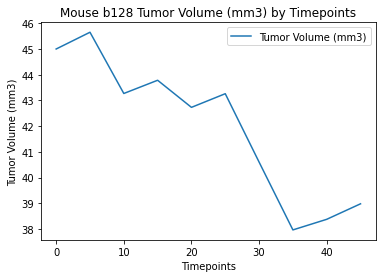

In [22]:
#generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_b128 = clean_df.loc[clean_df['Mouse ID']=='b128']

#set variables
b128_x = mouse_b128['Timepoint']
b128_y = mouse_b128['Tumor Volume (mm3)']

#generate line chart
plt.plot(b128_x, b128_y, label = 'Tumor Volume (mm3)')

#create titles & labels
plt.title('Mouse b128 Tumor Volume (mm3) by Timepoints')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')

plt.legend(loc='best')

plt.show()

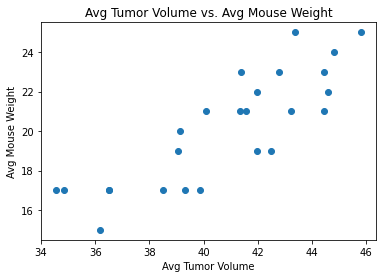

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter_group = capomulin_mouse.groupby(['Mouse ID']).mean()

avg_capomulin_tumor = capomulin_scatter_group['Tumor Volume (mm3)']
avg_capomulin_weight = capomulin_scatter_group['Weight (g)']

plt.scatter(avg_capomulin_tumor, avg_capomulin_weight)

#add title & lables
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Avg Tumor Volume')
plt.ylabel('Avg Mouse Weight')
plt.show()

## Correlation and Regression

The correlation between Avg Tumor Volume & Avg Mouse Weight is 0.84
The r-squared is: 0.7088568047708721
The rvalue is: 0.841936342469472


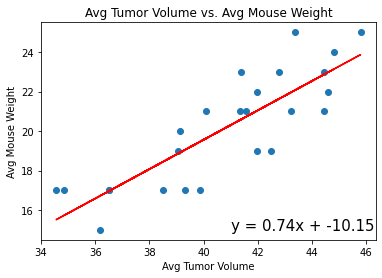

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correlation
correlation = st.pearsonr(avg_capomulin_tumor,avg_capomulin_weight)
print(f"The correlation between Avg Tumor Volume & Avg Mouse Weight is {round(correlation[0],2)}")

#calculate the linear regression
x_values = avg_capomulin_tumor
y_values = avg_capomulin_weight
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values = avg_capomulin_tumor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#generate linear regression model
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")

#add titles & labels
plt.annotate(line_eq,(41,15),fontsize = 15, color = 'black')
plt.xlabel('Avg Tumor Volume')
plt.ylabel('Avg Mouse Weight')
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
print(f"The r-squared is: {rvalue**2}")
print(f"The rvalue is: {rvalue}")